# Solving Partial Differential Equations using Numerical Methods

### This notebook shows the solutions to the following Partial Differential Equations using Numerical Methods (Forward Euler Method)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#to be seperated for wave equation and heat equation
class FiniteDiff:
    
    def __init__(self, I, xmin, xmax, tmin, tmax, c, dx, dt, Heat = False):
        
        self.dx = dx
        self.xmin = xmin
        self.xmax = xmax
        self.dt = dt
        self.tmin = tmin
        self.tmax = tmax
        self.c = c
        self.F = c*dt/dx
        self.Heat = Heat
        if Heat == True:
            self.F = (c**2)*(dt/(dx**2))
        self.I = I
        
        self.nx = int((self.xmax-self.xmin)/dx)
        self.nt = int((self.tmax-self.tmin)/dt)
        
        self.x = np.linspace(self.xmin, self.xmax, (self.nx+1))
        self.t = np.linspace(self.tmin, self.tmax, (self.nt+1))
        
        self.u = np.zeros((self.nt+1, self.nx+1))
        
    def do(self):
        
        for i in range(0, self.nx+1):
            self.u[0, i] = self.I(self.x[i])
        
        if self.Heat == True:
            for n in range(0, self.nt):
                for i in range(1, self.nx):
                    self.u[n+1, i] = self.u[n,i] + self.F*(self.u[n,i-1] - 2*self.u[n,i] + self.u[n,i+1])
                    self.u[n,0], self.u[n,self.nx] = 0, 0                        
        else:
            for n in range(0, self.nt):
                for i in range(1, self.nx):
                    self.u[n+1, i] = 2*(1-(self.F**2))*self.u[n,i] - self.u[n-1,i] + (self.F**2)*(self.u[n,i+1]+self.u[n,i-1])
                    self.u[n,0], self.u[n,self.nx] = 0, 0
        
        self.data = pd.DataFrame(self.u[:,1:-1])
        
        return self.data
    
    def plot(self, title):
        
        xmat, tmat = np.meshgrid(self.x,self.t)
        fig = plt.figure()
        ax = Axes3D(fig)
        surface = ax.plot_surface(tmat,xmat,self.u)
        plt.xlabel('t')
        plt.ylabel('x')
        plt.title(str(title))
        ax.view_init(40,60)
        plt.show()                                        

## Wave Equation of a Plucked String

Use the finite difference method to solve the wave equation for a plucked string:

\begin{equation}
\frac{\delta^2u}{\delta t^2} = 4\frac{\delta^2u}{\delta x^2} \ for \ 0\leq x \leq 1 \ and \ 0\leq t \leq 0.5 \\
u(0,t) = 0 \ for \ 0\leq t \leq 0.5 \\
u(1,t) = 0 \ for \ 0\leq t \leq 0.5 \\
u(x,0) = f(x) = x  \ \ \ for \ 0\leq x \leq \frac{3}{5} \\
u(x,0) = f(x) = 1.5 - 1.5x \ \ \ for \ \frac{3}{5}\leq x \leq 1 \\
\frac{\delta u}{\delta u} = g(x) = 0 \ for \ 0\leq x \leq 1 \\
where: \\
\Delta x = 0.1 \\ 
\Delta t = 0.05 \\
c\frac{\Delta t}{\Delta x} = 1
\end{equation}

In [3]:
xmin, xmax, dx = 0, 1, 0.1
tmin, tmax, dt = 0, 0.5, 0.05
c = 2

I = lambda x: 1.5 - 1.5*x if x>=(3/5) else x

String = FiniteDiff(I, xmin, xmax, tmin, tmax, c, dx, dt, Heat = False)
String.do()

,0,1,2,3,4,5,6,7,8
0,1.000000e-01,2.000000e-01,3.000000e-01,0.40,5.000000e-01,0.60,4.500000e-01,3.000000e-01,1.500000e-01
1,2.000000e-01,4.000000e-01,6.000000e-01,0.80,1.000000e+00,0.95,9.000000e-01,6.000000e-01,3.000000e-01
2,3.000000e-01,6.000000e-01,9.000000e-01,1.20,1.250000e+00,1.30,1.100000e+00,9.000000e-01,4.500000e-01
3,4.000000e-01,8.000000e-01,1.200000e+00,1.35,1.500000e+00,1.40,1.300000e+00,9.500000e-01,6.000000e-01
4,5.000000e-01,1.000000e+00,1.250000e+00,1.50,1.500000e+00,1.50,1.250000e+00,1.000000e+00,5.000000e-01
5,6.000000e-01,9.500000e-01,1.300000e+00,1.40,1.500000e+00,1.35,1.200000e+00,8.000000e-01,4.000000e-01
6,4.500000e-01,9.000000e-01,1.100000e+00,1.30,1.250000e+00,1.20,9.000000e-01,6.000000e-01,3.000000e-01
7,3.000000e-01,6.000000e-01,9.000000e-01,0.95,1.000000e+00,0.80,6.000000e-01,4.000000e-01,2.000000e-01
8,1.500000e-01,3.000000e-01,4.500000e-01,0.60,5.000000e-01,0.40,3.000000e-01,2.000000e-01,1.000000e-01
9,-2.220446e-16,-2.220446e-16,-4.440892e-16,0.00,-2.220446e-16,0.00,2.220446e-16,2.220446e-16,-4.440892e-16


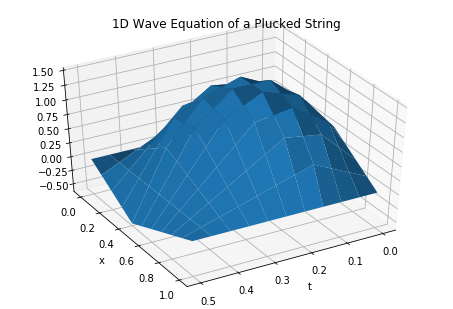

In [4]:
String.plot(title = '1D Wave Equation of a Plucked String')

## 1D Wave Equation

\begin{equation}
\frac{\delta^2u}{\delta t^2} = 300\frac{\delta^2u}{\delta x^2} \ for \ 0\leq x \leq 1 \ and \ 0\leq t \leq 0.5 \\
u(0,t) = 0 \ for \ 0\leq t \leq 0.5 \\
u(1,t) = 0 \ for \ 0\leq t \leq 0.5 \\
u(x,0) = f(x) = e^{-k(x-x_0)^2}  \ \ \ for \ 0\leq x \leq \frac{3}{5} \\
\frac{\delta u}{\delta u} = g(x) = 0 \ for \ 0\leq x \leq 1 \\
where: \\
\Delta x = 0.01 \\ 
\Delta t = \frac{\Delta x}{c} \\
k = 1000 \\
x_0 = 0.3
\end{equation}

In [5]:
xmin, xmax, dx = 0, 1, 0.01
tmin, tmax, dt = 0, 0.5, (0.01/300)
c = 300
k = 1000
x0 = 0.3

I = lambda x: np.exp(-k*((x-x0)**2))

WavE = FiniteDiff(I, xmin, xmax, tmin, tmax, c, dx, dt, Heat = False)
WavE.do()

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
0,2.991122e-37,8.939487e-35,2.187420e-32,4.382208e-30,7.187782e-28,9.652456e-26,1.061260e-23,9.553161e-22,7.040660e-20,4.248354e-18,...,4.508027e-157,2.506244e-162,1.140778e-167,4.251284e-173,1.297120e-178,3.240271e-184,6.627102e-190,1.109704e-195,1.521359e-201,1.707643e-207
1,8.939569e-35,2.187450e-32,4.382298e-30,7.188000e-28,9.652894e-26,1.061332e-23,9.554126e-22,7.041721e-20,4.249310e-18,2.099495e-16,...,6.638819e-152,4.508027e-157,2.506244e-162,1.140778e-167,4.251284e-173,1.297120e-178,3.240271e-184,6.627102e-190,1.109704e-195,1.521359e-201
2,2.187420e-32,4.382298e-30,7.188000e-28,9.652894e-26,1.061332e-23,9.554126e-22,7.041721e-20,4.249310e-18,2.099495e-16,8.493293e-15,...,8.004538e-147,6.638819e-152,4.508027e-157,2.506244e-162,1.140778e-167,4.251284e-173,1.297120e-178,3.240271e-184,6.627102e-190,1.109704e-195
3,4.382208e-30,7.188000e-28,9.652894e-26,1.061332e-23,9.554126e-22,7.041721e-20,4.249310e-18,2.099495e-16,8.493293e-15,2.813285e-13,...,7.901742e-142,8.004538e-147,6.638819e-152,4.508027e-157,2.506244e-162,1.140778e-167,4.251284e-173,1.297120e-178,3.240271e-184,6.627102e-190
4,7.187782e-28,9.652894e-26,1.061332e-23,9.554126e-22,7.041721e-20,4.249310e-18,2.099495e-16,8.493293e-15,2.813285e-13,7.630358e-12,...,6.386317e-137,7.901742e-142,8.004538e-147,6.638819e-152,4.508027e-157,2.506244e-162,1.140778e-167,4.251284e-173,1.297120e-178,3.240271e-184
5,9.652456e-26,1.061332e-23,9.554126e-22,7.041721e-20,4.249310e-18,2.099495e-16,8.493293e-15,2.813285e-13,7.630358e-12,1.694711e-10,...,4.225900e-132,6.386317e-137,7.901742e-142,8.004538e-147,6.638819e-152,4.508027e-157,2.506244e-162,1.140778e-167,4.251284e-173,1.297120e-178
6,1.061260e-23,9.554126e-22,7.041721e-20,4.249310e-18,2.099495e-16,8.493293e-15,2.813285e-13,7.630358e-12,1.694711e-10,3.082510e-09,...,2.289439e-127,4.225900e-132,6.386317e-137,7.901742e-142,8.004538e-147,6.638819e-152,4.508027e-157,2.506244e-162,1.140778e-167,4.251284e-173
7,9.553161e-22,7.041721e-20,4.249310e-18,2.099495e-16,8.493293e-15,2.813285e-13,7.630358e-12,1.694711e-10,3.082510e-09,4.592286e-08,...,1.015500e-122,2.289439e-127,4.225900e-132,6.386317e-137,7.901742e-142,8.004538e-147,6.638819e-152,4.508027e-157,2.506244e-162,1.140778e-167
8,7.040660e-20,4.249310e-18,2.099495e-16,8.493293e-15,2.813285e-13,7.630358e-12,1.694711e-10,3.082510e-09,4.592286e-08,5.604729e-07,...,3.687840e-118,1.015500e-122,2.289439e-127,4.225900e-132,6.386317e-137,7.901742e-142,8.004538e-147,6.638819e-152,4.508027e-157,2.506244e-162
9,4.248354e-18,2.099495e-16,8.493293e-15,2.813285e-13,7.630358e-12,1.694711e-10,3.082510e-09,4.592286e-08,5.604729e-07,5.605436e-06,...,1.096491e-113,3.687840e-118,1.015500e-122,2.289439e-127,4.225900e-132,6.386317e-137,7.901742e-142,8.004538e-147,6.638819e-152,4.508027e-157


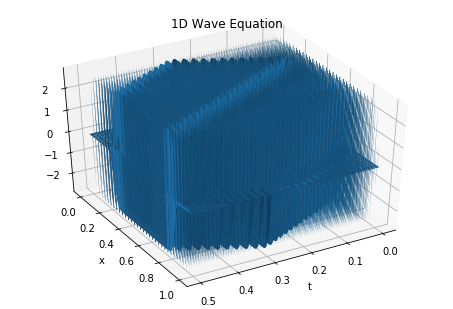

In [6]:
WavE.plot(title='1D Wave Equation')

## Heat Equation

\begin{equation}
\frac{\delta^2u}{\delta t^2} = \frac{\delta^2u}{\delta x^2} \ for \ 0\leq x \leq 1 \ and \ 0\leq t \leq 0.2 \\
u(0,t) = g_1(t) = 0 \ for \ 0\leq t \leq 0.2 \\
u(1,t) = g_2(t) = 0 \ for \ 0\leq t \leq 0.2 \\
u(x,0) = f(x) = 4x - 4x^2  \ \ \ for \ 0\leq x \leq 1 \\
where: \\
\Delta x = 0.2 \\ 
\Delta t = 0.02 \\
c^2\frac{\Delta t}{(\Delta x)^2} = 0.5
\end{equation}

In [7]:
xmin, xmax, dx = 0, 1, 0.2
tmin, tmax, dt = 0, 0.2, 0.02
c = 1

I = lambda x: 4*x - 4*(x**2)

Heat = FiniteDiff(I, xmin, xmax, tmin, tmax, c, dx, dt, Heat = True)
Heat.do()

,0,1,2,3
0,0.640000,0.960000,0.960000,0.640000
1,0.480000,0.800000,0.800000,0.480000
2,0.400000,0.640000,0.640000,0.400000
3,0.320000,0.520000,0.520000,0.320000
4,0.260000,0.420000,0.420000,0.260000
5,0.210000,0.340000,0.340000,0.210000
6,0.170000,0.275000,0.275000,0.170000
7,0.137500,0.222500,0.222500,0.137500
8,0.111250,0.180000,0.180000,0.111250
9,0.090000,0.145625,0.145625,0.090000


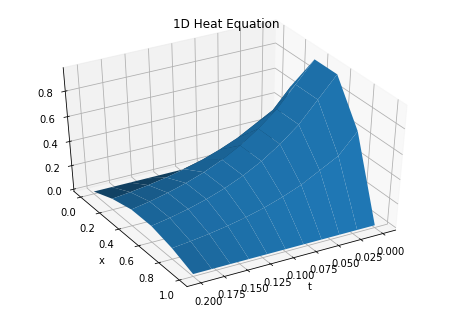

In [8]:
Heat.plot(title = '1D Heat Equation')